In [1]:
# Import libraries
import os
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import Model
from tensorflow.keras.saving import load_model

2023-10-18 23:43:41.311817: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-18 23:43:41.313434: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-18 23:43:41.339110: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-18 23:43:41.339139: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-18 23:43:41.339156: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

In [2]:
# Data normalization
normalize = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
])

In [3]:
IMG_SIZE = (224, 224)
IMG_SHAPE = IMG_SIZE + (3,)

In [4]:
# Set directories
root_dir = os.getcwd()
model_dir = os.path.join(root_dir, "models")
test_dir = os.path.join(root_dir, "test-dataset")

In [5]:
model = load_model(os.path.join(model_dir, "mosquitoes_model.keras"))

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 111, 111, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 54, 54, 32)       

In [7]:
idx = []

In [8]:
for i in range(len(model.layers)):
	layer = model.layers[i]
	if 'conv' not in layer.name:
		continue
	idx.append(i)
	print(i, layer.name, layer.output.shape)

0 conv2d (None, 222, 222, 32)
3 conv2d_1 (None, 109, 109, 32)
6 conv2d_2 (None, 52, 52, 32)
9 conv2d_3 (None, 24, 24, 32)
11 conv2d_4 (None, 10, 10, 32)
12 conv2d_5 (None, 8, 8, 32)
13 conv2d_6 (None, 6, 6, 32)
14 conv2d_7 (None, 4, 4, 32)


In [9]:
outputs = [model.layers[i + 1].output for i in idx]

In [10]:
model = Model(inputs=model.inputs, outputs=outputs)

1/1 [==============================] - 0s 105ms/step


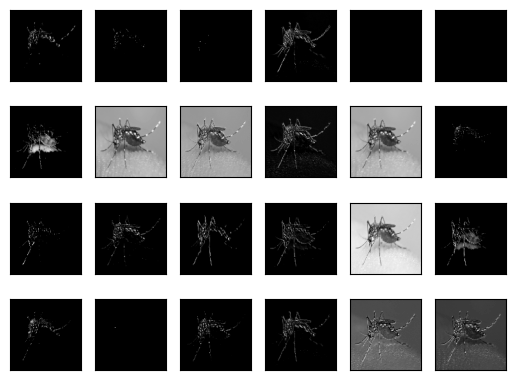

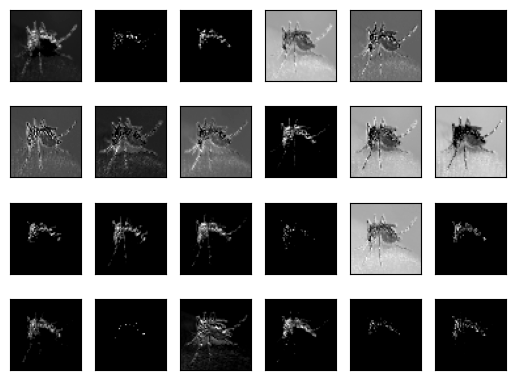

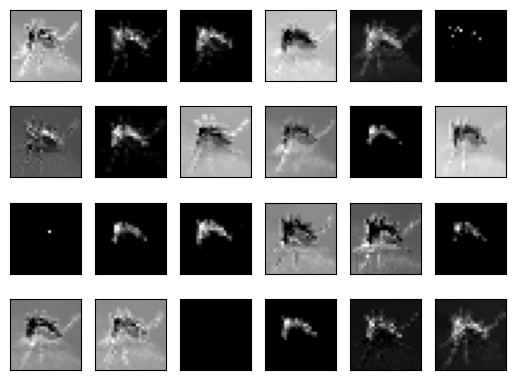

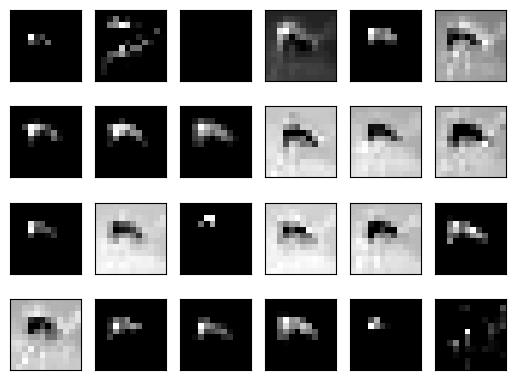

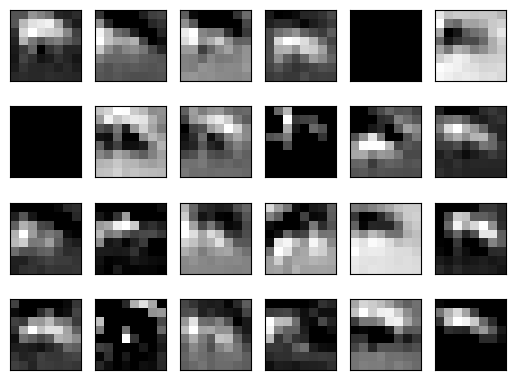

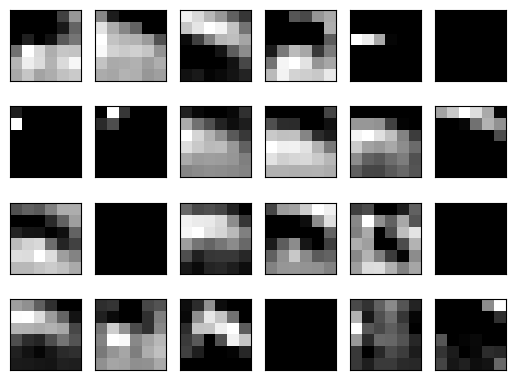

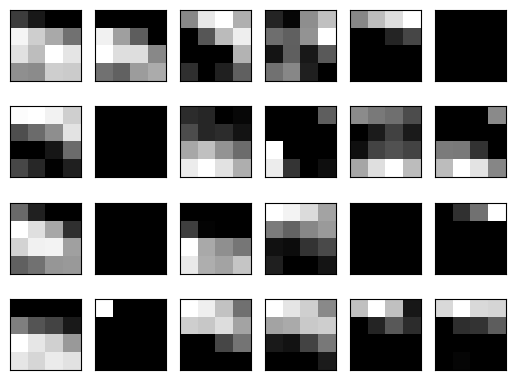

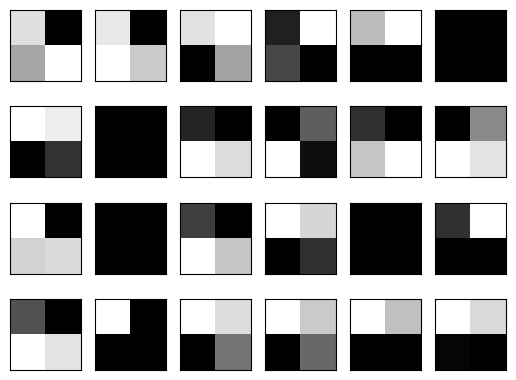

In [11]:
img = cv2.imread(os.path.join(test_dir, "Aedes_aegypti_feeding.jpg"))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = tf.image.resize(img, IMG_SIZE)

yhat = model.predict(np.expand_dims(img, 0))
""" yhat = tf.nn.sigmoid(yhat[0])
yhat = tf.where(yhat < 0.5, 0, 1)
yhat = np.array(yhat) """

for fmap in yhat:
	ix = 1
	for _ in range(4):
		for _ in range(6):
			ax = plt.subplot(4, 6, ix)
			ax.set_xticks([])
			ax.set_yticks([])
			plt.imshow(fmap[0, :, :, ix-1], cmap='gray')
			ix += 1
	plt.show()